In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [37]:
train = pd.read_csv('https://raw.githubusercontent.com/ibraabdike/Liver-Cirrhosis-Classification/refs/heads/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ibraabdike/Liver-Cirrhosis-Classification/refs/heads/main/test.csv')
original = pd.read_csv('https://raw.githubusercontent.com/ibraabdike/Liver-Cirrhosis-Classification/refs/heads/main/cirrhosis.csv')

In [3]:
combined_df = pd.concat([train,original], axis=0)
combined_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,ID
0,0.0,999,D-penicillamine,21532,M,N,N,N,N,2.3,...,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,NaN
1,1.0,2574,Placebo,19237,F,N,N,N,N,0.9,...,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,NaN
2,2.0,3428,Placebo,13727,F,N,Y,Y,Y,3.3,...,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,NaN
3,3.0,2576,Placebo,18460,F,N,N,N,N,0.6,...,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,NaN
4,4.0,788,Placebo,16658,F,N,Y,N,N,1.1,...,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,NaN


In [34]:
combined_df.shape

(8323, 20)

In [38]:
test.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [39]:
test.shape

(5271, 18)

<function matplotlib.pyplot.show(close=None, block=None)>

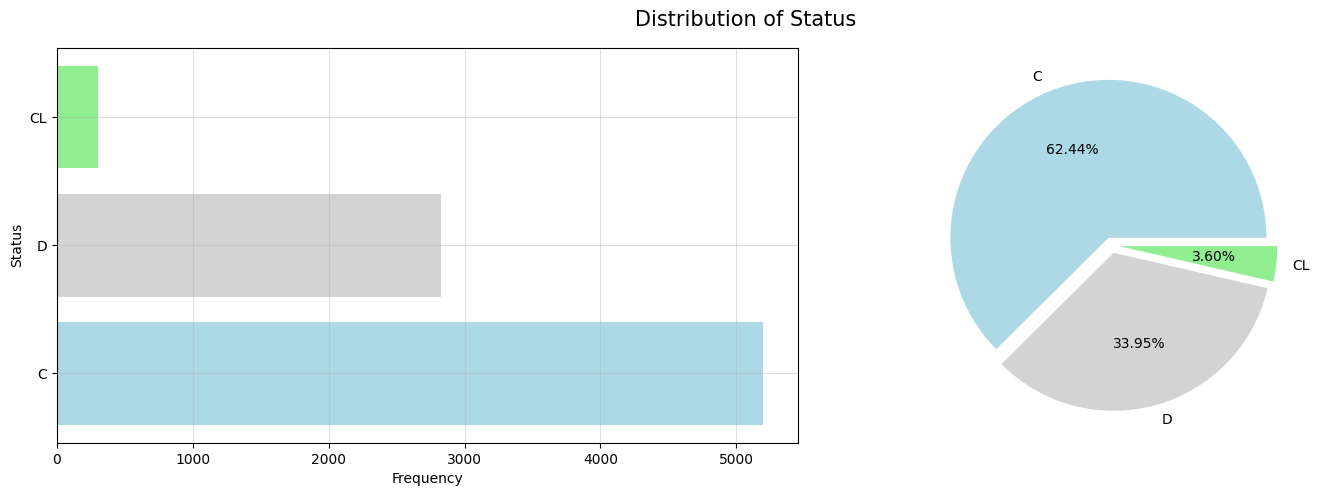

In [6]:
Cases = combined_df['Status'].value_counts()
colors = ['lightblue', 'lightgray',"lightgreen"]

# Create a two-subplot layout
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

# Bar chart on the first subplot
ax1.barh(y =Cases.index , width=Cases.values , color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel("Status")
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(Cases.values , labels=Cases.index , explode=([0.05] * len(Cases.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution of Status', fontsize=15)
plt.tight_layout(pad=1)
plt.show

In [4]:
test.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [7]:
combined_df = combined_df.drop(['id','ID'], axis = 1)


In [6]:
combined_df.isnull().sum()

,0
N_Days,0
Drug,106
Age,0
Sex,0
Ascites,106
Hepatomegaly,106
Spiders,106
Edema,0
Bilirubin,0
Cholesterol,134


In [8]:
#implementing Stratified K-Fold Cross-Validation on the combined_df dataset
# to split the data into K subsets while preserving the distribution of the target variable Status in each fold
#  this ensures that the distribution of the target variable Status is preserved in each fold.
#

combined_df['kfold'] = -1

combined_df = combined_df.sample(frac=1).reset_index(drop = True)

kf = StratifiedKFold(n_splits = 10)

for fold,(train_index, val_index) in enumerate(kf.split(combined_df,combined_df['Status'])):
    combined_df.loc[val_index, 'kfold'] = fold

for fold in range(10):
    train_data = combined_df[combined_df.kfold != fold].reset_index(drop = True)
    valid_data = combined_df[combined_df.kfold == fold].reset_index(drop = True)


In [9]:
print(combined_df.select_dtypes(include ="object").columns)
print(combined_df.select_dtypes(exclude ="object").columns)

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status'], dtype='object')
Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'kfold'],
      dtype='object')


In [10]:
cat_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']
num_cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper','Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin','Stage']

In [11]:
test.isnull().sum()

,0
N_Days,0
Drug,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0
Cholesterol,0


In [12]:
X_train = train_data.drop(['Status','kfold'], axis = 1)
X_val = valid_data.drop(['Status','kfold'], axis = 1)
y_train = train_data['Status']
y_val = valid_data['Status']

In [13]:
columns_to_fill = ['Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
X_train[columns_to_fill] = X_train[columns_to_fill].fillna(X_train[columns_to_fill].median())
X_val[columns_to_fill] = X_val[columns_to_fill].fillna(X_val[columns_to_fill].median())

In [14]:
col_to_fill = ['Drug','Ascites','Hepatomegaly','Spiders']
X_train[col_to_fill] = X_train[col_to_fill].fillna('unknown')
X_val[col_to_fill] = X_val[col_to_fill].fillna('unknown')


In [15]:
y_train.fillna(y_train.mode()[0], inplace = True)
y_val.fillna(y_val.mode()[0], inplace = True)

In [16]:
is_X_train_df = isinstance(X_train, pd.DataFrame)
print(is_X_train_df)

True


In [17]:
print(X_train.shape)
print(X_val.shape)

(7491, 18)
(832, 18)


In [18]:
# Encoding categorical features
from sklearn.compose import ColumnTransformer

cat_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
ohe = OneHotEncoder(sparse_output = False)

preprocessor = ColumnTransformer(
    transformers=[
     ('cat', OneHotEncoder(sparse_output=False), cat_cols)
      ],
    remainder='passthrough'
     )  # Leaves other (numeric) columns as they are


X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
test = preprocessor.transform(test)

In [19]:
# Label Encoding the target variable
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)

In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machines": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forests": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name}: {model.score(X_val, y_val)}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.7548076923076923
K-Nearest Neighbors: 0.7463942307692307
Support Vector Machines: 0.7391826923076923
Decision Trees: 0.7151442307692307
Random Forests: 0.8197115384615384
XGBClassifier: 0.8149038461538461


In [25]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Best model: {best_model}")
print(f"Best score: {grid.best_score_}")

Best model: RandomForestClassifier(max_depth=30, min_samples_split=5)
Best score: 0.8320639215640867
